In [1]:
import numpy as np
from matplotlib import pylab as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.kernel_approximation

[-3 -2 -1  0  1  2]
[ 0.33180641 -0.43637101 -0.36854457  0.47292642  1.3143974   1.38222384]


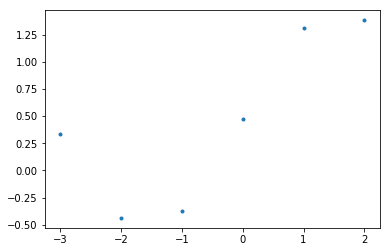

In [2]:
class DummyEnvironment(object):
    def sample(self, x):
        noise = 1/2 * np.random.normal(0,0.5) + 1/2 * np.random.normal(2,1)
        return np.sin(x) + noise
        #return np.sin(x)

x = np.arange(-3, 3, 1)
# y = np.arange(-3, 3, 0.25)
env = DummyEnvironment()
t = env.sample(x)
plt.plot(x, t,'.')
print(x)
print(t)

In [3]:
from collections import defaultdict

iter_num = 100
values = defaultdict(list)

for i in range(iter_num):
    for j in x:
        values[j].append(env.sample(j))

In [4]:
VaR = {}
level = 0.5
VaR_point = int(iter_num * level)
VaR_list = []
CVaR_list = []
mean_list = []
median_list = []

for key, value in values.items():
    values[key].sort()
    VaR[key] = values[key][VaR_point]
    VaR_list.append(values[key][VaR_point])
    CVaR_list.append(np.average(values[key][-(iter_num - VaR_point):]))
    mean_list.append(np.average(values[key]))
    median_list.append(values[key][50])


In [5]:
VaR_list[-2:]

[1.8274809324617678, 1.9350375519027354]

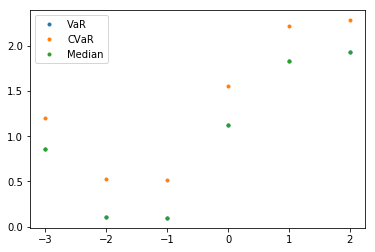

In [6]:
plt.plot(x, VaR_list, '.', label ='VaR')
plt.plot(x, CVaR_list, '.', label = 'CVaR')
#plt.plot(x, mean_list, '.', label = 'Mean')
plt.plot(x, median_list, '.', label = 'Median')
plt.legend()

In [7]:
from sklearn.mixture import GMM

np.random.seed(1)

gmm = GMM(3, n_iter=1)
gmm.means_ = np.array([[-1], [0], [3]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.3, 0.5, 0.2])

X = gmm.sample(1000)

/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/admin-u6015325/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function sample_gaussian is deprecated; The function sample_gaussian is deprecated in 0.18 and will be removed in 0.20. Use numpy.random.multivariate_normal instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/admin-u6015325/anaconda3/lib/python3.6/site-packag

(array([0.00485579, 0.        , 0.00485579, 0.        , 0.00485579,
        0.00971159, 0.00485579, 0.01456738, 0.00485579, 0.00971159,
        0.01942317, 0.04855793, 0.02427897, 0.01456738, 0.05341373,
        0.0728369 , 0.04855793, 0.05341373, 0.11168325, 0.12139484,
        0.21365491, 0.15538539, 0.1505296 , 0.27192443, 0.20879912,
        0.30591499, 0.26221285, 0.28649182, 0.26706864, 0.24278967,
        0.19423174, 0.17966436, 0.13110642, 0.12625063, 0.08740428,
        0.06798111, 0.0728369 , 0.06312532, 0.10197166, 0.1505296 ,
        0.1505296 , 0.12139484, 0.10682746, 0.12139484, 0.05341373,
        0.0728369 , 0.04855793, 0.00971159, 0.        , 0.00485579]),
 array([-5.58064657, -5.374707  , -5.16876744, -4.96282787, -4.75688831,
        -4.55094874, -4.34500918, -4.13906961, -3.93313004, -3.72719048,
        -3.52125091, -3.31531135, -3.10937178, -2.90343222, -2.69749265,
        -2.49155308, -2.28561352, -2.07967395, -1.87373439, -1.66779482,
        -1.46185526, -1.25

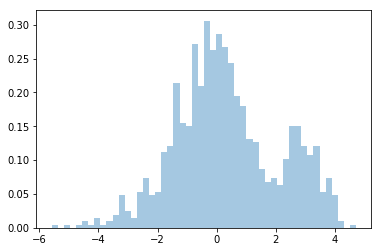

In [8]:
plt.hist(X, 50, normed=True, histtype='stepfilled', alpha=0.4)

In [9]:
import numpy as np
from collections import defaultdict


In [10]:
numActions = 10
numRounds = 1000

biases = [1.0 / k for k in range(5, 5+numActions)]

In [63]:
means = [0.5 + b for b in biases]
rewards = lambda choice: 10 * np.random.random() + 20*biases[choice]

gen_rewards = {}
for choice in range(numActions):
    temp = []
    for i in range(numRounds):
        temp.append(rewards(choice))
    gen_rewards[choice] = temp

VaR = {}
level = 0.5
VaR_point = int(numRounds * level)
VaR_list = []
CVaR_list = []
mean_list = []
median_list = []

for key, value in gen_rewards.items():
    gen_rewards[key].sort()
    VaR[key] = gen_rewards[key][VaR_point]
    VaR_list.append(gen_rewards[key][VaR_point])
    CVaR_list.append(np.average(gen_rewards[key][-(numRounds - VaR_point):]))
    mean_list.append(np.average(gen_rewards[key]))
    median_list.append(gen_rewards[key][50])

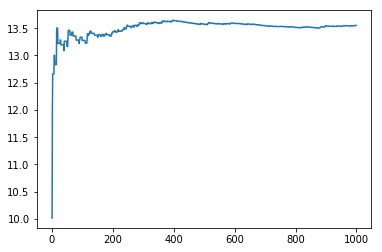

In [66]:
# test for how CVaR change when getting more and more observations
reward_list = []
CVaR_list = []
for i in range(numRounds):
    reward_list.append(rewards(0))
    CVaR_list.append(CVaR(reward_list, 0.9))
    
plt.plot(CVaR_list)

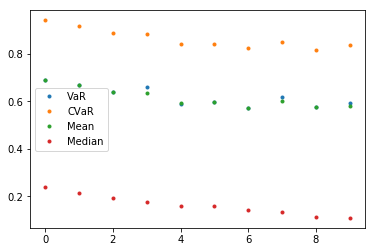

In [12]:
plt.plot(range(numActions), VaR_list, '.', label ='VaR')
plt.plot(range(numActions), CVaR_list, '.', label = 'CVaR')
plt.plot(range(numActions), mean_list, '.', label = 'Mean')
plt.plot(range(numActions), median_list, '.', label = 'Median')
plt.legend()

In [55]:
def CVaR(data, a):
    data = np.sort(data)
    # idx = int(data.shape[0] * a)
    idx = int(len(data) * a)
    CVaR = np.mean(data[idx:])
    return CVaR

def CVaR_ucb(numActions, reward, a):
    payoffSums = [0] * numActions
    numPlays = [1] * numActions
    ucbs = [0] * numActions
    payoff_dict = defaultdict(list)
    
    # initialize empirical sums
    for t in range(numActions):
        theReward = reward(t)
        payoffSums[t] = theReward
        payoff_dict[t].append(theReward)
        yield t, payoffSums[t], ucbs
        
    t = numActions

    while True:
        ucbs = [CVaR(payoff_dict[i], a) for i in range(numActions)]
        action = max(range(numActions), key=lambda i: ucbs[i])
        theReward = reward(action)
        numPlays[action] += 1
        payoff_dict[action].append(theReward)
        payoffSums[action] += theReward

        yield action, theReward, ucbs
        t = t + 1


In [57]:
numActions = 10
numRounds = 1000

biases = [1.0 / k for k in range(5, 5+numActions)]
rewards = lambda choice: np.random.random() + biases[choice]

bestAction = 0
cumulativeReward = 0
cumulativeRegret_list = []
bestActionCumulativeReward = 0
level = 0.5

t = numActions
for (choice, reward, ucbs) in CVaR_ucb(numActions, rewards, level):
    cumulativeReward += reward
    bestActionCumulativeReward += reward if choice == bestAction else rewards(bestAction)
    regret = bestActionCumulativeReward - cumulativeReward
    cumulativeRegret_list.append(regret)
    #regretBound = 8 * math.log(t + 5) * invDeltaSum + (1 + math.pi*math.pi / 3) * deltaSum

    #print("regret: %d\tregretBound: %.2f" % (regret, regretBound))

    t += 1
    if t >= numRounds:
        break

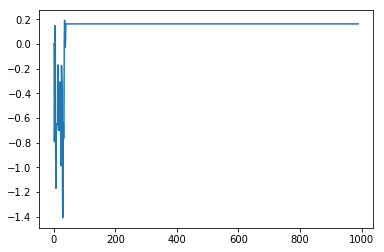

In [48]:
cumulativeReward

plt.plot(cumulativeRegret_list)

In [53]:
import math

# upperBound: int, int -> float
# the size of the upper confidence bound for ucb1
def upperBound(step, numPlays):
    return math.sqrt(2 * math.log(step + 1) / numPlays)


# ucb1: int, (int, int -> float) -> generator
# perform the ucb1 bandit learning algorithm.  numActions is the number of
# actions, indexed from 0. reward is a function (or callable) accepting as
# input the action and producing as output the reward for that action
def ucb1(numActions, reward):
    payoffSums = [0] * numActions
    numPlays = [1] * numActions
    ucbs = [0] * numActions

    # initialize empirical sums
    for t in range(numActions):
        payoffSums[t] = reward(t,t)
        yield t, payoffSums[t], ucbs

    t = numActions

    while True:
        ucbs = [payoffSums[i] / numPlays[i] + upperBound(t, numPlays[i]) for i in range(numActions)]
        action = max(range(numActions), key=lambda i: ucbs[i])
        theReward = reward(action, t)
        numPlays[action] += 1
        payoffSums[action] += theReward

        yield action, theReward, ucbs
        t = t + 1


# Test UCB1 using stochastic payoffs for 10 actions.
numActions = 10
numRounds = 1000

biases = [1.0 / k for k in range(5,5+numActions)]
means = [0.5 + b for b in biases]
deltas = [means[0] - x for x in means[1:]]
deltaSum = sum(deltas)
invDeltaSum = sum(1/x for x in deltas)

bestAction = 0
rewards = lambda choice, t: np.random.random() + biases[choice]

cumulativeReward = 0
cumulativeRegret_list = []
bestActionCumulativeReward = 0

t = numActions
for (choice, reward, ucbs) in ucb1(numActions, rewards):
    cumulativeReward += reward
    bestActionCumulativeReward += reward if choice == bestAction else rewards(bestAction, t)
    regret = bestActionCumulativeReward - cumulativeReward
    cumulativeRegret_list.append(regret)
    regretBound = 8 * math.log(t + 5) * invDeltaSum + (1 + math.pi*math.pi / 3) * deltaSum

    #print("regret: %d\tregretBound: %.2f" % (regret, regretBound))

    t += 1
    if t >= numRounds:
        break

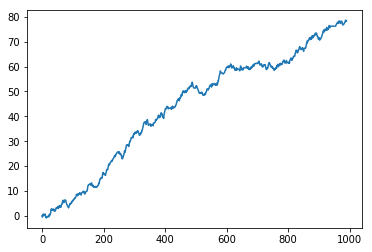

In [54]:
cumulativeReward
plt.plot(cumulativeRegret_list)

In [5]:
import numpy as np
np.random.normal(2,0)

2.0